### Importing required libraries

In [75]:
import pandas as pd
import json, re
import glob
import numpy as np
import matplotlib.pyplot as plt


### Reading single JSON file

In [13]:
with open('tablets/1400501520.json') as json_data:
    t_data = json.load(json_data)
t_data

{u'ProductInfo': {u'Features': u'NOOK HD 7" 16GB Tablet',
  u'ImgURL': u'http://ecx.images-amazon.com/images/I/41jpVvVz41L._SY300_.jpg',
  u'Name': u'NOOK HD 7" 16GB Tablet',
  u'Price': u'$229.00',
  u'ProductID': u'1400501520'},
 u'Reviews': [{u'Author': u'LuvAmazon',
   u'Content': u'I\'ve owned an Ipad 2, an original Kindle Fire, and first generation 3g dual screen Nook. I decided it was time to upgrade my original Nook and went with this tablet. I purchased mine direct from B&N.; This is a fantastic ereader with a few tablet functions. I really like the interface on this ereader more so than the Kindle Fire. Don\'t get me wrong, the Kindle Fire is a very nice device, but I like the personal touch I can give the Nook HD. It\'s more customizable.I can create my own wallpaper and customize my home screen. The ereader is very light and easy to hold with a contoured, grippy back. The screen resolution is fantastic! Even small print is readable. The colors in magazines is exceptional an

In [16]:
r = t_data['Reviews']
p = t_data['ProductInfo']


### Putting into DataFrame

In [17]:
df_r = pd.DataFrame(r)
df_p = pd.DataFrame(p, index=[0])



In [18]:
df_p


,Features,ImgURL,Name,Price,ProductID
0,"NOOK HD 7"" 16GB Tablet",http://ecx.images-amazon.com/images/I/41jpVvVz...,"NOOK HD 7"" 16GB Tablet",$229.00,1400501520


In [19]:
df_r

,Author,Content,Date,Overall,ReviewID,Title
0,LuvAmazon,"I've owned an Ipad 2, an original Kindle Fire,...","February 18, 2013",5.0,R1Q9HS45OIV1U3,Great little device!
1,C. Liao,"I tried Kindle hd, Samsung tab 2, and Nexus 7....","December 31, 2012",4.0,RVYCRX5OF0PVP,"best screen out of all 7"" tablets"
2,PlainWhite,If you are looking for a very light and compac...,"May 14, 2013",5.0,R1EXQE7OU8FU0O,compact and useful
3,"John Johnson ""Jon404""","Bought a 16 GB one at my local B&N; store, on ...","October 25, 2013",5.0,R2NMB2HOWYOWTR,Great product at a great price
4,Arianastar,I have used the Kindle HD and this Nook HD bea...,"December 14, 2012",4.0,RCQN05WOOTYOI,The best tablet on the market.
5,JamieofOregon,I returned my Kindle fire 8.9 after a single d...,"June 11, 2013",5.0,R373RHMRTBD0DN,Buy from Barnes and Noble for a major discount...
6,DC10,"Hi Folks, I Originally had this review in the ...","December 12, 2013",5.0,ROX6OFU4UAOK1,Don't give up on your NOOK HD just yet - make ...
7,Perry,<!--\n\nfunction fp_resizePlayerSpace(nsPrefix...,"June 29, 2013",5.0,R1RIUV0GP6F9SX,Best Tablet On A Budget!
8,Daper Don,My fiance was in the market for a new e-reader...,"January 15, 2013",5.0,R189TKVWLGB6CR,Perfect Gift!
9,everyday man,not so happy with it. I have had my Nook HD fo...,"July 20, 2013",3.0,R172ZU798MVRU0,"Initially liked, but now...."


### Deleting the unwanted columns

In [20]:
del df_p['ImgURL']

df_p



,Features,Name,Price,ProductID
0,"NOOK HD 7"" 16GB Tablet","NOOK HD 7"" 16GB Tablet",$229.00,1400501520


In [21]:
del df_r['ReviewID']
df_r

,Author,Content,Date,Overall,Title
0,LuvAmazon,"I've owned an Ipad 2, an original Kindle Fire,...","February 18, 2013",5.0,Great little device!
1,C. Liao,"I tried Kindle hd, Samsung tab 2, and Nexus 7....","December 31, 2012",4.0,"best screen out of all 7"" tablets"
2,PlainWhite,If you are looking for a very light and compac...,"May 14, 2013",5.0,compact and useful
3,"John Johnson ""Jon404""","Bought a 16 GB one at my local B&N; store, on ...","October 25, 2013",5.0,Great product at a great price
4,Arianastar,I have used the Kindle HD and this Nook HD bea...,"December 14, 2012",4.0,The best tablet on the market.
5,JamieofOregon,I returned my Kindle fire 8.9 after a single d...,"June 11, 2013",5.0,Buy from Barnes and Noble for a major discount...
6,DC10,"Hi Folks, I Originally had this review in the ...","December 12, 2013",5.0,Don't give up on your NOOK HD just yet - make ...
7,Perry,<!--\n\nfunction fp_resizePlayerSpace(nsPrefix...,"June 29, 2013",5.0,Best Tablet On A Budget!
8,Daper Don,My fiance was in the market for a new e-reader...,"January 15, 2013",5.0,Perfect Gift!
9,everyday man,not so happy with it. I have had my Nook HD fo...,"July 20, 2013",3.0,"Initially liked, but now...."


### Merging two datafrmes

In [22]:
df_com = pd.concat([df_r, pd.DataFrame(p, index=df_r.index)], axis=1)
df_com

,Author,Content,Date,Overall,Title,Features,ImgURL,Name,Price,ProductID
0,LuvAmazon,"I've owned an Ipad 2, an original Kindle Fire,...","February 18, 2013",5.0,Great little device!,"NOOK HD 7"" 16GB Tablet",http://ecx.images-amazon.com/images/I/41jpVvVz...,"NOOK HD 7"" 16GB Tablet",$229.00,1400501520
1,C. Liao,"I tried Kindle hd, Samsung tab 2, and Nexus 7....","December 31, 2012",4.0,"best screen out of all 7"" tablets","NOOK HD 7"" 16GB Tablet",http://ecx.images-amazon.com/images/I/41jpVvVz...,"NOOK HD 7"" 16GB Tablet",$229.00,1400501520
2,PlainWhite,If you are looking for a very light and compac...,"May 14, 2013",5.0,compact and useful,"NOOK HD 7"" 16GB Tablet",http://ecx.images-amazon.com/images/I/41jpVvVz...,"NOOK HD 7"" 16GB Tablet",$229.00,1400501520
3,"John Johnson ""Jon404""","Bought a 16 GB one at my local B&N; store, on ...","October 25, 2013",5.0,Great product at a great price,"NOOK HD 7"" 16GB Tablet",http://ecx.images-amazon.com/images/I/41jpVvVz...,"NOOK HD 7"" 16GB Tablet",$229.00,1400501520
4,Arianastar,I have used the Kindle HD and this Nook HD bea...,"December 14, 2012",4.0,The best tablet on the market.,"NOOK HD 7"" 16GB Tablet",http://ecx.images-amazon.com/images/I/41jpVvVz...,"NOOK HD 7"" 16GB Tablet",$229.00,1400501520
5,JamieofOregon,I returned my Kindle fire 8.9 after a single d...,"June 11, 2013",5.0,Buy from Barnes and Noble for a major discount...,"NOOK HD 7"" 16GB Tablet",http://ecx.images-amazon.com/images/I/41jpVvVz...,"NOOK HD 7"" 16GB Tablet",$229.00,1400501520
6,DC10,"Hi Folks, I Originally had this review in the ...","December 12, 2013",5.0,Don't give up on your NOOK HD just yet - make ...,"NOOK HD 7"" 16GB Tablet",http://ecx.images-amazon.com/images/I/41jpVvVz...,"NOOK HD 7"" 16GB Tablet",$229.00,1400501520
7,Perry,<!--\n\nfunction fp_resizePlayerSpace(nsPrefix...,"June 29, 2013",5.0,Best Tablet On A Budget!,"NOOK HD 7"" 16GB Tablet",http://ecx.images-amazon.com/images/I/41jpVvVz...,"NOOK HD 7"" 16GB Tablet",$229.00,1400501520
8,Daper Don,My fiance was in the market for a new e-reader...,"January 15, 2013",5.0,Perfect Gift!,"NOOK HD 7"" 16GB Tablet",http://ecx.images-amazon.com/images/I/41jpVvVz...,"NOOK HD 7"" 16GB Tablet",$229.00,1400501520
9,everyday man,not so happy with it. I have had my Nook HD fo...,"July 20, 2013",3.0,"Initially liked, but now....","NOOK HD 7"" 16GB Tablet",http://ecx.images-amazon.com/images/I/41jpVvVz...,"NOOK HD 7"" 16GB Tablet",$229.00,1400501520


### Deleting unwanted columns from combined dataframe


In [23]:
del df_com['ImgURL']
df_com

,Author,Content,Date,Overall,Title,Features,Name,Price,ProductID
0,LuvAmazon,"I've owned an Ipad 2, an original Kindle Fire,...","February 18, 2013",5.0,Great little device!,"NOOK HD 7"" 16GB Tablet","NOOK HD 7"" 16GB Tablet",$229.00,1400501520
1,C. Liao,"I tried Kindle hd, Samsung tab 2, and Nexus 7....","December 31, 2012",4.0,"best screen out of all 7"" tablets","NOOK HD 7"" 16GB Tablet","NOOK HD 7"" 16GB Tablet",$229.00,1400501520
2,PlainWhite,If you are looking for a very light and compac...,"May 14, 2013",5.0,compact and useful,"NOOK HD 7"" 16GB Tablet","NOOK HD 7"" 16GB Tablet",$229.00,1400501520
3,"John Johnson ""Jon404""","Bought a 16 GB one at my local B&N; store, on ...","October 25, 2013",5.0,Great product at a great price,"NOOK HD 7"" 16GB Tablet","NOOK HD 7"" 16GB Tablet",$229.00,1400501520
4,Arianastar,I have used the Kindle HD and this Nook HD bea...,"December 14, 2012",4.0,The best tablet on the market.,"NOOK HD 7"" 16GB Tablet","NOOK HD 7"" 16GB Tablet",$229.00,1400501520
5,JamieofOregon,I returned my Kindle fire 8.9 after a single d...,"June 11, 2013",5.0,Buy from Barnes and Noble for a major discount...,"NOOK HD 7"" 16GB Tablet","NOOK HD 7"" 16GB Tablet",$229.00,1400501520
6,DC10,"Hi Folks, I Originally had this review in the ...","December 12, 2013",5.0,Don't give up on your NOOK HD just yet - make ...,"NOOK HD 7"" 16GB Tablet","NOOK HD 7"" 16GB Tablet",$229.00,1400501520
7,Perry,<!--\n\nfunction fp_resizePlayerSpace(nsPrefix...,"June 29, 2013",5.0,Best Tablet On A Budget!,"NOOK HD 7"" 16GB Tablet","NOOK HD 7"" 16GB Tablet",$229.00,1400501520
8,Daper Don,My fiance was in the market for a new e-reader...,"January 15, 2013",5.0,Perfect Gift!,"NOOK HD 7"" 16GB Tablet","NOOK HD 7"" 16GB Tablet",$229.00,1400501520
9,everyday man,not so happy with it. I have had my Nook HD fo...,"July 20, 2013",3.0,"Initially liked, but now....","NOOK HD 7"" 16GB Tablet","NOOK HD 7"" 16GB Tablet",$229.00,1400501520


### Required Dataframe

In [24]:
df_req = df_com[['Name','ProductID','Content','Title','Features','Overall']]
df_req.head()


,Name,ProductID,Content,Title,Features,Overall
0,"NOOK HD 7"" 16GB Tablet",1400501520,"I've owned an Ipad 2, an original Kindle Fire,...",Great little device!,"NOOK HD 7"" 16GB Tablet",5.0
1,"NOOK HD 7"" 16GB Tablet",1400501520,"I tried Kindle hd, Samsung tab 2, and Nexus 7....","best screen out of all 7"" tablets","NOOK HD 7"" 16GB Tablet",4.0
2,"NOOK HD 7"" 16GB Tablet",1400501520,If you are looking for a very light and compac...,compact and useful,"NOOK HD 7"" 16GB Tablet",5.0
3,"NOOK HD 7"" 16GB Tablet",1400501520,"Bought a 16 GB one at my local B&N; store, on ...",Great product at a great price,"NOOK HD 7"" 16GB Tablet",5.0
4,"NOOK HD 7"" 16GB Tablet",1400501520,I have used the Kindle HD and this Nook HD bea...,The best tablet on the market.,"NOOK HD 7"" 16GB Tablet",4.0


## Getting all the JSON files

In [25]:
Final_df = pd.DataFrame()
read_files = glob.glob("tablets/*.json")
for i in range(0,len(read_files)):
    with open(read_files[i], 'rb') as x:
        JSONFILE = json.load(x)
    review_df = pd.DataFrame(JSONFILE['Reviews'])
    product = JSONFILE['ProductInfo']
    combined_df = pd.concat([review_df, pd.DataFrame(product, index=review_df.index)], axis=1)
    Final_df = pd.concat([Final_df, combined_df]) 
    
Final_df.head()



,Author,Content,Date,Features,ImgURL,Name,Overall,Price,ProductID,ReviewID,Title
0,LuvAmazon,"I've owned an Ipad 2, an original Kindle Fire,...","February 18, 2013","NOOK HD 7"" 16GB Tablet",http://ecx.images-amazon.com/images/I/41jpVvVz...,"NOOK HD 7"" 16GB Tablet",5.0,$229.00,1400501520,R1Q9HS45OIV1U3,Great little device!
1,C. Liao,"I tried Kindle hd, Samsung tab 2, and Nexus 7....","December 31, 2012","NOOK HD 7"" 16GB Tablet",http://ecx.images-amazon.com/images/I/41jpVvVz...,"NOOK HD 7"" 16GB Tablet",4.0,$229.00,1400501520,RVYCRX5OF0PVP,"best screen out of all 7"" tablets"
2,PlainWhite,If you are looking for a very light and compac...,"May 14, 2013","NOOK HD 7"" 16GB Tablet",http://ecx.images-amazon.com/images/I/41jpVvVz...,"NOOK HD 7"" 16GB Tablet",5.0,$229.00,1400501520,R1EXQE7OU8FU0O,compact and useful
3,"John Johnson ""Jon404""","Bought a 16 GB one at my local B&N; store, on ...","October 25, 2013","NOOK HD 7"" 16GB Tablet",http://ecx.images-amazon.com/images/I/41jpVvVz...,"NOOK HD 7"" 16GB Tablet",5.0,$229.00,1400501520,R2NMB2HOWYOWTR,Great product at a great price
4,Arianastar,I have used the Kindle HD and this Nook HD bea...,"December 14, 2012","NOOK HD 7"" 16GB Tablet",http://ecx.images-amazon.com/images/I/41jpVvVz...,"NOOK HD 7"" 16GB Tablet",4.0,$229.00,1400501520,RCQN05WOOTYOI,The best tablet on the market.


In [26]:
Final_df1 = Final_df.reset_index()
Final_df1.head()


,index,Author,Content,Date,Features,ImgURL,Name,Overall,Price,ProductID,ReviewID,Title
0,0,LuvAmazon,"I've owned an Ipad 2, an original Kindle Fire,...","February 18, 2013","NOOK HD 7"" 16GB Tablet",http://ecx.images-amazon.com/images/I/41jpVvVz...,"NOOK HD 7"" 16GB Tablet",5.0,$229.00,1400501520,R1Q9HS45OIV1U3,Great little device!
1,1,C. Liao,"I tried Kindle hd, Samsung tab 2, and Nexus 7....","December 31, 2012","NOOK HD 7"" 16GB Tablet",http://ecx.images-amazon.com/images/I/41jpVvVz...,"NOOK HD 7"" 16GB Tablet",4.0,$229.00,1400501520,RVYCRX5OF0PVP,"best screen out of all 7"" tablets"
2,2,PlainWhite,If you are looking for a very light and compac...,"May 14, 2013","NOOK HD 7"" 16GB Tablet",http://ecx.images-amazon.com/images/I/41jpVvVz...,"NOOK HD 7"" 16GB Tablet",5.0,$229.00,1400501520,R1EXQE7OU8FU0O,compact and useful
3,3,"John Johnson ""Jon404""","Bought a 16 GB one at my local B&N; store, on ...","October 25, 2013","NOOK HD 7"" 16GB Tablet",http://ecx.images-amazon.com/images/I/41jpVvVz...,"NOOK HD 7"" 16GB Tablet",5.0,$229.00,1400501520,R2NMB2HOWYOWTR,Great product at a great price
4,4,Arianastar,I have used the Kindle HD and this Nook HD bea...,"December 14, 2012","NOOK HD 7"" 16GB Tablet",http://ecx.images-amazon.com/images/I/41jpVvVz...,"NOOK HD 7"" 16GB Tablet",4.0,$229.00,1400501520,RCQN05WOOTYOI,The best tablet on the market.


In [27]:
del Final_df1['ImgURL']
Final_df1.head()



,index,Author,Content,Date,Features,Name,Overall,Price,ProductID,ReviewID,Title
0,0,LuvAmazon,"I've owned an Ipad 2, an original Kindle Fire,...","February 18, 2013","NOOK HD 7"" 16GB Tablet","NOOK HD 7"" 16GB Tablet",5.0,$229.00,1400501520,R1Q9HS45OIV1U3,Great little device!
1,1,C. Liao,"I tried Kindle hd, Samsung tab 2, and Nexus 7....","December 31, 2012","NOOK HD 7"" 16GB Tablet","NOOK HD 7"" 16GB Tablet",4.0,$229.00,1400501520,RVYCRX5OF0PVP,"best screen out of all 7"" tablets"
2,2,PlainWhite,If you are looking for a very light and compac...,"May 14, 2013","NOOK HD 7"" 16GB Tablet","NOOK HD 7"" 16GB Tablet",5.0,$229.00,1400501520,R1EXQE7OU8FU0O,compact and useful
3,3,"John Johnson ""Jon404""","Bought a 16 GB one at my local B&N; store, on ...","October 25, 2013","NOOK HD 7"" 16GB Tablet","NOOK HD 7"" 16GB Tablet",5.0,$229.00,1400501520,R2NMB2HOWYOWTR,Great product at a great price
4,4,Arianastar,I have used the Kindle HD and this Nook HD bea...,"December 14, 2012","NOOK HD 7"" 16GB Tablet","NOOK HD 7"" 16GB Tablet",4.0,$229.00,1400501520,RCQN05WOOTYOI,The best tablet on the market.


# Final Working DataFrame

In [28]:
Final_df1

,index,Author,Content,Date,Features,Name,Overall,Price,ProductID,ReviewID,Title
0,0,LuvAmazon,"I've owned an Ipad 2, an original Kindle Fire,...","February 18, 2013","NOOK HD 7"" 16GB Tablet","NOOK HD 7"" 16GB Tablet",5.0,$229.00,1400501520,R1Q9HS45OIV1U3,Great little device!
1,1,C. Liao,"I tried Kindle hd, Samsung tab 2, and Nexus 7....","December 31, 2012","NOOK HD 7"" 16GB Tablet","NOOK HD 7"" 16GB Tablet",4.0,$229.00,1400501520,RVYCRX5OF0PVP,"best screen out of all 7"" tablets"
2,2,PlainWhite,If you are looking for a very light and compac...,"May 14, 2013","NOOK HD 7"" 16GB Tablet","NOOK HD 7"" 16GB Tablet",5.0,$229.00,1400501520,R1EXQE7OU8FU0O,compact and useful
3,3,"John Johnson ""Jon404""","Bought a 16 GB one at my local B&N; store, on ...","October 25, 2013","NOOK HD 7"" 16GB Tablet","NOOK HD 7"" 16GB Tablet",5.0,$229.00,1400501520,R2NMB2HOWYOWTR,Great product at a great price
4,4,Arianastar,I have used the Kindle HD and this Nook HD bea...,"December 14, 2012","NOOK HD 7"" 16GB Tablet","NOOK HD 7"" 16GB Tablet",4.0,$229.00,1400501520,RCQN05WOOTYOI,The best tablet on the market.
5,5,JamieofOregon,I returned my Kindle fire 8.9 after a single d...,"June 11, 2013","NOOK HD 7"" 16GB Tablet","NOOK HD 7"" 16GB Tablet",5.0,$229.00,1400501520,R373RHMRTBD0DN,Buy from Barnes and Noble for a major discount...
6,6,DC10,"Hi Folks, I Originally had this review in the ...","December 12, 2013","NOOK HD 7"" 16GB Tablet","NOOK HD 7"" 16GB Tablet",5.0,$229.00,1400501520,ROX6OFU4UAOK1,Don't give up on your NOOK HD just yet - make ...
7,7,Perry,<!--\n\nfunction fp_resizePlayerSpace(nsPrefix...,"June 29, 2013","NOOK HD 7"" 16GB Tablet","NOOK HD 7"" 16GB Tablet",5.0,$229.00,1400501520,R1RIUV0GP6F9SX,Best Tablet On A Budget!
8,8,Daper Don,My fiance was in the market for a new e-reader...,"January 15, 2013","NOOK HD 7"" 16GB Tablet","NOOK HD 7"" 16GB Tablet",5.0,$229.00,1400501520,R189TKVWLGB6CR,Perfect Gift!
9,9,everyday man,not so happy with it. I have had my Nook HD fo...,"July 20, 2013","NOOK HD 7"" 16GB Tablet","NOOK HD 7"" 16GB Tablet",3.0,$229.00,1400501520,R172ZU798MVRU0,"Initially liked, but now...."


In [29]:
temp=Final_df1


### Converting Null values in Rating to 0

In [30]:
temp['Overall']=temp['Overall'].str.replace('None','0')

In [31]:
Final_df1['Overall']=Final_df1['Overall'].apply(pd.to_numeric)  #Converting Rating values to numeric 


In [34]:
rating_avg=(Final_df1.groupby(['ProductID'])['Overall'].mean()).reset_index()
rating_avg.head()

,ProductID,Overall
0,1400501520,4.420000
1,1400501741,3.863636
2,1400698987,4.400000
3,8072112198,5.000000
4,B00008MNDW,5.000000


In [39]:
temp['Price']=temp['Price'].apply(pd.to_numeric) # Similarly converting Price to Numeric

In [40]:
temp.head()

,index,Author,Content,Date,Features,Name,Overall,Price,ProductID,ReviewID,Title
0,0,LuvAmazon,"I've owned an Ipad 2, an original Kindle Fire,...","February 18, 2013","NOOK HD 7"" 16GB Tablet","NOOK HD 7"" 16GB Tablet",5.0,229.0,1400501520,R1Q9HS45OIV1U3,Great little device!
1,1,C. Liao,"I tried Kindle hd, Samsung tab 2, and Nexus 7....","December 31, 2012","NOOK HD 7"" 16GB Tablet","NOOK HD 7"" 16GB Tablet",4.0,229.0,1400501520,RVYCRX5OF0PVP,"best screen out of all 7"" tablets"
2,2,PlainWhite,If you are looking for a very light and compac...,"May 14, 2013","NOOK HD 7"" 16GB Tablet","NOOK HD 7"" 16GB Tablet",5.0,229.0,1400501520,R1EXQE7OU8FU0O,compact and useful
3,3,"John Johnson ""Jon404""","Bought a 16 GB one at my local B&N; store, on ...","October 25, 2013","NOOK HD 7"" 16GB Tablet","NOOK HD 7"" 16GB Tablet",5.0,229.0,1400501520,R2NMB2HOWYOWTR,Great product at a great price
4,4,Arianastar,I have used the Kindle HD and this Nook HD bea...,"December 14, 2012","NOOK HD 7"" 16GB Tablet","NOOK HD 7"" 16GB Tablet",4.0,229.0,1400501520,RCQN05WOOTYOI,The best tablet on the market.


In [41]:
temp['Price']=temp['Price'].str.replace('$','')
temp['Price']=temp['Price'].str.replace(',','')
temp['Price']=temp['Price'].str.replace('Unavailable','')


AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [42]:
price_df=(temp.groupby(['ProductID'])['Price'].mean()).reset_index()
price_df.head()

,ProductID,Price
0,1400501520,229.0
1,1400501741,NaN
2,1400698987,NaN
3,8072112198,1545.0
4,B00008MNDW,NaN


In [50]:
price_rating_df = pd.merge(rating_avg,price_df,on='ProductID')  #Merging Rating and Price columns
price_rating_df.head()

,ProductID,Overall,Price
0,1400501520,4.420000,229.0
1,1400501741,3.863636,NaN
2,1400698987,4.400000,NaN
3,8072112198,5.000000,1545.0
4,B00008MNDW,5.000000,NaN


In [66]:
price_rating_df['Price'].max()

1545.0

In [86]:
price_range=price_rating_df.groupby(pd.cut(price_rating_df["Price"], np.arange(0, 1.0+1550, 50))).mean()
price_range.head()


,Overall,Price
Price,,
"(0.0, 50.0]",2.888889,48.950000
"(50.0, 100.0]",3.221596,82.620455
"(100.0, 150.0]",3.355811,130.098727
"(150.0, 200.0]",3.419126,185.726667
"(200.0, 250.0]",3.549255,238.533500


In [107]:
price_range.reset_index()
price_range.head()


,Overall
Price,
"(0.0, 50.0]",2.888889
"(50.0, 100.0]",3.221596
"(100.0, 150.0]",3.355811
"(150.0, 200.0]",3.419126
"(200.0, 250.0]",3.549255


In [123]:
price_range.reset_index()

,Price,Overall
0,"(0.0, 50.0]",2.888889
1,"(50.0, 100.0]",3.221596
2,"(100.0, 150.0]",3.355811
3,"(150.0, 200.0]",3.419126
4,"(200.0, 250.0]",3.549255
5,"(250.0, 300.0]",3.730933
6,"(300.0, 350.0]",3.731760
7,"(350.0, 400.0]",4.162880
8,"(400.0, 450.0]",3.895400
9,"(450.0, 500.0]",3.928824


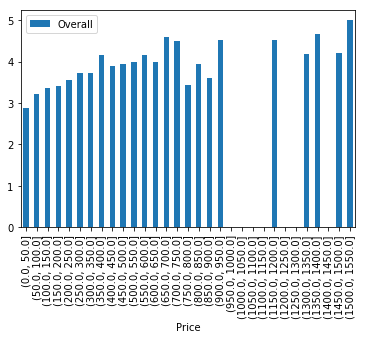

In [127]:
price_range.plot(y='Overall', use_index=True, kind='bar')
plt.show()